In [6]:
import pandas as pd
import numpy as np
from scipy.sparse.csgraph import reverse_cuthill_mckee
from scipy.sparse import csr_matrix
import matplotlib.pylab as plt
import scipy.sparse as sps
from random import randint
import operator
#df = pd.read_csv('Data/online_retail_transaction.csv',header=None,index_col=None)
df = pd.read_csv('Dataset Paper/dataBMS1_transiction.csv',header=None,index_col=None)
df.shape # dimensione originale

(6000, 481)

In [161]:
def compute_band_matrix(original_dataset=None, dim_finale=1000, nome_file_item=None, num_sensibile=1):
    """
        Compute band_matrix , permutazione casuale di righe e colonne
        estrapola a caso item_sensibili
    """
    if original_dataset is not None and len(original_dataset) >= dim_finale and len(original_dataset.columns) >= dim_finale:
        # leggo nomi items
        file = open(nome_file_item, "r")
        items = file.read().splitlines()
        # permuto righe e colonne del df inizale e prendo le prime :dim_finale
        np.random.seed(seed=13)
        random_column = np.random.permutation(original_dataset.shape[1])[:dim_finale]
        random_row = np.random.permutation(original_dataset.shape[0])[:dim_finale]
        # recupero gli item selezionati nel relativo ordine == colonne
        items_reordered = [items[i] for i in random_column]
        # df selezionato e square
        
        # eliminare le righe nulle a priori
        df_square = df.iloc[random_row][random_column];
        # eliminare solo se items sensibili nulli
        
        # selezioni gli utlimi num_sensibili come item sensibili
        # check se esiste almeno un item sensibile

    

        f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
        
        # check che le colonne sensibili non siano nulle
        lista_sensibili = df_square.columns[-num_sensibile:]
        # plot matrice sparsa iniziale
        # plt
        ax1.spy(df_square, marker='.', markersize='1')
        #ax1.show()

        # applicazione algoritmo RCM
        sparse = csr_matrix(df_square)
        order = reverse_cuthill_mckee(sparse)

        # solo se add gli 0
        # riordino i dati sensibili
        # df_sensibili = df_sensibili.iloc[order]

        # ora devo prendere gli item selzionati prima e riordinarli ancora
        # secondo quello scritto in order quindi
        items_final = [items_reordered[i] for i in order]
        column_reordered = [df_square.columns[i] for i in order]
        items_final = dict(zip(column_reordered,items_final))

        # df bandizzato
        df_square_band = df_square.iloc[order][column_reordered]
        # plotto
        ax2.spy(df_square_band, marker='.', markersize='1')
        #ax2.show()
        plt.show()
        # banda dataframe inizale
        [i, j] = np.where(df_square == 1)
        bw = max(i-j) + 1
        print("Bandwidth first RCM", bw)

        # banda dataframe dopo RCM
        [i, j] = np.where(df_square_band == 1)
        bw = max(i-j) + 1
        print("Bandwidth after RCM", bw)
        return df_square_band, items_final, lista_sensibili
    
    elif original_dataset is not None and len(original_dataset) >= dim_finale:
        # devo essere sicuro di avere il numero di righe giusto
        # allora devo squadrarlo con la dimensione finale definita dall'utente
        # taglio il dataset
        random_row = np.random.permutation(original_dataset.shape[0])
        original_dataset = original_dataset.iloc[random_row][:dim_finale]
        file = open(nome_file_item, "r")
        items = file.read().splitlines()
        original_dataset = original_dataset.reset_index()
        original_dataset.drop('index',axis=1,inplace=True)
        
        columns = original_dataset.columns
        
        zero_data_to_add = np.zeros(shape=(len(original_dataset),len(original_dataset)-len(columns)))
        # aggiungo li zero con la dimensione finale relativa
        columns_to_add = ["temp_"+str(x) for x in range(0,len(original_dataset)-len(columns))]
        df_to_add = pd.DataFrame(zero_data_to_add, columns=columns_to_add,index=original_dataset.index,dtype='uint8')
        #df_to_add
        # creo il dataset completo aggiungendo tutti gli zeri che mancano
        original_dataset = pd.concat([original_dataset, df_to_add], axis=1)
        # permuto righe e colonne del df inizale e prendo le prime :dim_finale
        np.random.seed(seed=13)
        items = original_dataset.columns
        
        random_column = np.random.permutation(original_dataset.shape[1])
        random_row = np.random.permutation(original_dataset.shape[0])
        
        original_dataset.columns = [i for i in range(0,len(original_dataset.columns))]
        #print(original_dataset.columns)
        # recupero gli item selezionati nel relativo ordine == colonne
        items_reordered = [items[i] for i in random_column]
        # df selezionato e square
        # eliminare le righe nulle a priori
        df_square = original_dataset.iloc[random_row][random_column];
        # eliminare solo se items sensibili nulli
        
        

        f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
        
        # check che le colonne sensibili non siano nulle
        lista_sensibili = df_square.columns[-num_sensibile:]
        # plot matrice sparsa iniziale
        # plt
        ax1.spy(df_square, marker='.', markersize='1')
        #ax1.show()

        # applicazione algoritmo RCM
        sparse = csr_matrix(df_square)
        order = reverse_cuthill_mckee(sparse)

        # solo se add gli 0
        # riordino i dati sensibili
        # df_sensibili = df_sensibili.iloc[order]

        # ora devo prendere gli item selzionati prima e riordinarli ancora
        # secondo quello scritto in order quindi
        items_final = [items_reordered[i] for i in order]
        column_reordered = [df_square.columns[i] for i in order]
        items_final = dict(zip(column_reordered,items_final))

        # df bandizzato
        df_square_band = df_square.iloc[order][column_reordered]
        # plotto
        ax2.spy(df_square_band, marker='.', markersize='1')
        #ax2.show()
        plt.show()
        # banda dataframe inizale
        [i, j] = np.where(df_square == 1)
        bw = max(i-j) + 1
        print("Bandwidth first RCM", bw)

        # banda dataframe dopo RCM
        [i, j] = np.where(df_square_band == 1)
        bw = max(i-j) + 1
        print("Bandwidth after RCM", bw)
    
        return df_square_band, items_final, lista_sensibili
            



In [167]:

def check_conflict(dataframe, row_i, row_j, items_sensibili):
    # se hanno un items sensibile in comune allora sono in conflitto
    dati_sensibili_row_i = items_sensibili[np.where(dataframe.iloc[row_i][items_sensibili] == 1)]
    dati_sensibili_row_j = items_sensibili[np.where(dataframe.iloc[row_j][items_sensibili] == 1)]
    # create set
    set_j = set(dati_sensibili_row_j)
    set_i = set(dati_sensibili_row_i)
    # check intersection
    return len(set_i.intersection(set_j)) > 0


def compute_hist(dataframe, items_sensibili):
    hist = dict(dataframe[items_sensibili].sum())
    return hist


def compute_candidate_list(dataframe, indice_transizione_sensibile, alpha,p, item_sensibili, all_transazioni_sensibili):
    alpha_p = alpha * p
    lc = list()  # lista candidate
    k = 1
    # controllo gli alpha*p transazioni precedenti non sono in conflitto
    cond = max(indice_transizione_sensibile - alpha_p - k, -1)
    i = indice_transizione_sensibile - 1;
    while (i > cond):
        if check_conflict(dataframe, indice_transizione_sensibile, i, item_sensibili):
            k = k + 1
        else:
            # controllo che nella lista non vi siano gia delle transizioni con quelli item sensibili
            # se si non la posso inserire
            conflitto_lista = False
            for index in lc:
                if check_conflict(dataframe, index, i, items_sensibili):
                    conflitto_lista = True
            if not conflitto_lista:
                lc.append(i)
            else:
                k = k + 1

        cond = max(indice_transizione_sensibile - alpha_p - k, -1)
        i -= 1
        
    # alpha*p transizioni successive che non sono in conflitto
    k = 1
    cond = min(indice_transizione_sensibile + alpha_p + k, len(dataframe))
    i = indice_transizione_sensibile + 1
    while(i < cond):
        if check_conflict(dataframe, indice_transizione_sensibile, i, items_sensibili):
            k = k + 1
        else:
            conflitto_lista = False
            for index in lc:
                if check_conflict(dataframe, index, i, items_sensibili):
                    conflitto_lista = True
            if not conflitto_lista:
                lc.append(i)
            else:
                k = k + 1
        cond = min(indice_transizione_sensibile + alpha_p + k, len(dataframe))
        i += 1
    
    to_remove = list()
    for i in range(0,len(lc)-1):
        for j in range(i+1,len(lc)):
            if check_conflict(dataframe,lc[i],lc[j],items_sensibili):
                to_remove.append(lc[j])
    to_remove = list(set(to_remove))
    for remove in to_remove:
        lc.remove(remove)
    
    error = False
    if len(lc) < p:
        error = True
        
    return lc,error


def selectBestTransactions(df, candidate_list, transaction_target, p, items_sensibili):
    all_items = list(df)
    QID_items = [x for x in all_items if x not in items_sensibili]

    #lista riportante gli item in comune con transactionTarget
    distance = list()    
    # remove list che hanno items_sensibili in comune
    # bisogna controllare che nella lista candidate non vi siano transizioni in conflitto con loro
    
    #for id in index[0]:
        
    for row in candidate_list:
        list1 = df.iloc[transaction_target][QID_items]
        list2 = df.iloc[row][QID_items]
        #da queste due liste, devo escludere le transazioni sensibili.
        
        #num. elementi in comune di due liste
        distance.append(sum([x and y for x, y in zip(list1, list2)]))

    #ottengo i p-1 indici della lista candidata con distanza maggiore
    major_indexs = list()
    for i in range(0, p-1):
        max_index,max_value = max(enumerate(distance), key=operator.itemgetter(1))
        major_indexs.append(max_index)
        distance[max_index] = -1

    #seleziono gli indici delle righe del dataframe con maggior QIitems in comune
    best_rows = list()
    for i in major_indexs:
        best_rows.append(candidate_list[i])

    return best_rows




In [168]:
def check_grado_privacy(hist_sensible_date, grado_privacy, len_dataframe):
    """
        compute se il grado della privacy può essere soddisfatto, se così non fosse
        si diminuisce il grado della privacy per averne uno ottimale, oppure si può
        decidere di modificare gli item sensibili
    """
    for value in hist_sensible_date.values():
        if value*grado_privacy >=len_dataframe-1:
            return False
        
    return True

def get_id_transazioni_sensibili(dataframe_bandizzato, items_sensibili):
    """
        get label delle transazioni sensibili
    """

    transazioni_sensibili = set(list(np.where(dataframe_bandizzato[items_sensibili] == 1)[0]))
    transazioni_sensibili_completa = list(np.where(dataframe_bandizzato[items_sensibili] == 1)[0])
    # item sensibili della transazione iesime
    item_sensibile_per_transazioni = list(np.where(dataframe_bandizzato[items_sensibili] == 1)[1])

    return transazioni_sensibili, transazioni_sensibili_completa, item_sensibile_per_transazioni


def CAHD(dataframe_bandizzato_temp, items_sensibili, nome_item, grado_privacy = 4, alfa=3):
    """
        funzione per il calcolo di CAHD su un dataframe_bandizzato dopo RCM
        con gli items sensibili (vedi paper per teoria)
    """
    # temp per non modificare quello originale
    dataframe_bandizzato = dataframe_bandizzato_temp.copy()
    #print(len(dataframe_bandizzato))

    # calcolo istogramma per i dati sensibili (visto come dizionario)
    hist = compute_hist(dataframe_bandizzato, items_sensibili)
    soddisfabile = False
    # da aggiungere se si vuole modificare la privacy perchè si sa che non viene raggiunta
    while not soddisfabile and grado_privacy > 0:
        soddisfabile = check_grado_privacy(hist, grado_privacy, len(dataframe_bandizzato))
        if not soddisfabile:
            grado_privacy -= 1
            
    print("grado di privacy soddisfabile: ", grado_privacy)
    # lunghezza del dataframe
    remaining = len(dataframe_bandizzato)

    # inidice delle righe delle transazioni sensibili non ripetute
    # indice delle transizioni sensibili con mapping 1-1 con item_sensibile_per_transizione
    # transazioni_sensibili_completa[i] --> indice della transizione
    # item_sensibile_per_transazioni[i] --> item sensibile per la transizione sopra
    transazioni_sensibili,transazioni_sensibili_completa, item_sensibile_per_transazioni = \
        get_id_transazioni_sensibili(dataframe_bandizzato, items_sensibili)


    # riempo il dizionario (hash_map) indicizzata con il numero della riga
    for t in transazioni_sensibili:
        index_t = np.where(np.array(transazioni_sensibili_completa) == t)[0]

    lc = dict()     # lista candidata

    #FORMO IL DATAFRAME ANONIMIZZATO [item sensibili sono riportati a destra]
    #Nota: codice aggiunto. Molti di questi argomenti possono essere passati esternamente e passati a loro volta
    #a funzioni interne
    all_items = list(df_square.columns)
    QID_items = [x for x in all_items if x not in items_sensibili]
    columns_list = QID_items.copy()
    for x in items_sensibili:
        columns_list.append(x)
    # dataframe anonimizzato dopo aver sopostato tutte le colonne degli item sensibili a destra
    dataframe_anonimizzato = pd.DataFrame(columns = columns_list,index = df_square.index)
    dict_group = list()

    #FIX: CAMBIO LA MEMORIZZAZIONE DA NUM.RIGA A LABEL RIGA
    # index delle row del datframe bandizzato relativo alle row sensibili
    id_sensitive_transaction = dataframe_bandizzato.iloc[list(transazioni_sensibili)].index

    #Ciclo finchè ho gruppi da anonimizzare
    done = False

    # lista dei gruppi con i relativi dati sensibili all'interno
    lista_gruppi =list()
    sd_gruppi = list()

    #indice che cicla tra gli id_delle transazioni sensibili
    ts_index = 0
    while not done:
        #se ho terminato di scorrere la lista delle transazioni sensibili esco dal ciclo
        if(ts_index > len(id_sensitive_transaction)-1):
            done = True
            break
        #seleziono la iesima transzione sensibile
        q = id_sensitive_transaction[ts_index]
        #passo da label a num.di riga
        t = dataframe_bandizzato.index.get_loc(q)

        #nel caso di cancellazioni, devo aggiornare la lista degli indici delle transazioni sensibili
        transazioni_sensibili = list()
        for i in id_sensitive_transaction:
            transazioni_sensibili.append(dataframe_bandizzato.index.get_loc(i))

        #lista candidata LC
        lc,errore = compute_candidate_list(dataframe_bandizzato, t, alfa, grado_privacy, items_sensibili, transazioni_sensibili)
        # se posso creare il gruppo
        if not errore:
            group = selectBestTransactions(dataframe_bandizzato, lc, t, grado_privacy,items_sensibili)
            #aggiungo la transazione bersaglio
            group.append(t)

            # somma degli items sensibili del gruppo iesimo relativo
            selected_sensitive_items = dataframe_bandizzato.iloc[group][items_sensibili].sum()
            # temp hist
            temp_hist = hist.copy()
            # aggiorno le occorrenze di ogni item sensbile

            for index in selected_sensitive_items.index:
                temp_hist[index] -= selected_sensitive_items.loc[index]

            # controllo se il gruppo creato va bene
            found = False
            for index in temp_hist.keys():
                # se non si può più soddisfare il grado di privacy

                if temp_hist[index] * grado_privacy > remaining:
                    found = True
                    ts_index += 1
                    break

            # se il gruppo invece va bene
            if not found:
                # update hist
                hist = temp_hist.copy()
                #DEVO RIMUOVERE EVENTUALI TRANSAZIONI SENSIBILI COMPRESE NEL GRUPPO DA id_sensitive_transaction
                label_group = dataframe_bandizzato.iloc[group].index
                id_sensitive_transaction = [x for x in id_sensitive_transaction if x not in label_group]

                # indice iesimo -> indice delle transazioni del gruppo iesimo
                dict_group.append(dataframe_bandizzato.index[group])

                # metto i QID nel datframe anonimizzato
                dataframe_anonimizzato.loc[list(dataframe_bandizzato.index[group])] = dataframe_bandizzato.loc[list(dataframe_bandizzato.index[group])]

                lista_gruppi.append(dataframe_bandizzato.loc[list(dataframe_bandizzato.index[group]),QID_items])

                for index in list(dataframe_bandizzato.index[group]):
                    # metto la somma dei SD del gruppo per ogni row del gruppo
                    dataframe_anonimizzato.loc[index][selected_sensitive_items.index] = selected_sensitive_items

                sd_gruppi.append(selected_sensitive_items) # aggiungo somma item sensibili relativi al gruppo iesimo

                # le droppo dal df iniziale
                dataframe_bandizzato = dataframe_bandizzato.drop(list(dataframe_bandizzato.index[group]))

                # compute row rimanenti
                remaining = len(dataframe_bandizzato.index)

        else:
            ts_index += 1

    #terminato il ciclo di formazione dei gruppi, mi rimane un supergruppo con le transazioni sensibili rimanenti o meno.

    # somma item sensibili nel gruppo rimasto
    #for i in range(0,dataframe_bandizzato.shape[0]):
    #    transaction = dataframe_bandizzato.index[i]
    #    dataframe_anonimizzato.loc[transaction] = dataframe_bandizzato.iloc[i]

    # update del dataframe anonimizzato con il super gruppo finale
    selected_sensitive_items = dataframe_bandizzato[items_sensibili].sum()
    dataframe_anonimizzato.loc[dataframe_bandizzato.index] = dataframe_bandizzato
    # metto la somma degli item
    for index in list(dataframe_bandizzato.index):
        dataframe_anonimizzato.loc[index,items_sensibili]= selected_sensitive_items
    lista_gruppi.append(dataframe_bandizzato[QID_items])
    sd_gruppi.append(selected_sensitive_items)
    # del datframe iniziale
    dataframe_bandizzato = None

    return dataframe_anonimizzato,lista_gruppi, sd_gruppi

1000


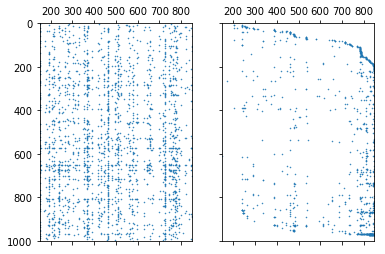

Bandwidth first RCM 958
Bandwidth after RCM 639


In [175]:
df_square,items,items_sensibili = compute_band_matrix(original_dataset = df, dim_finale = 1000, nome_file_item="Dataset Paper/lista_items_BMS1.txt",num_sensibile=10)


In [176]:
items

{643: 'temp_162',
 239: 239,
 781: 'temp_300',
 135: 135,
 131: 131,
 170: 170,
 903: 'temp_422',
 433: 433,
 503: 'temp_22',
 606: 'temp_125',
 38: 38,
 149: 149,
 189: 189,
 673: 'temp_192',
 235: 235,
 293: 293,
 447: 447,
 685: 'temp_204',
 335: 335,
 684: 'temp_203',
 929: 'temp_448',
 101: 101,
 349: 349,
 895: 'temp_414',
 624: 'temp_143',
 740: 'temp_259',
 500: 'temp_19',
 678: 'temp_197',
 412: 412,
 481: 'temp_0',
 551: 'temp_70',
 553: 'temp_72',
 164: 164,
 980: 'temp_499',
 618: 'temp_137',
 972: 'temp_491',
 925: 'temp_444',
 834: 'temp_353',
 601: 'temp_120',
 801: 'temp_320',
 41: 41,
 160: 160,
 790: 'temp_309',
 532: 'temp_51',
 961: 'temp_480',
 240: 240,
 726: 'temp_245',
 267: 267,
 6: 6,
 875: 'temp_394',
 821: 'temp_340',
 402: 402,
 687: 'temp_206',
 815: 'temp_334',
 788: 'temp_307',
 420: 420,
 616: 'temp_135',
 816: 'temp_335',
 577: 'temp_96',
 711: 'temp_230',
 60: 60,
 468: 468,
 556: 'temp_75',
 881: 'temp_400',
 676: 'temp_195',
 380: 380,
 249: 249,
 2

In [177]:
dataframe_anonimizzato,list_gruppi, sd_gruppi = CAHD(df_square,items_sensibili,[],grado_privacy=10,alfa = 3)


grado di privacy soddisfabile:  10


[954    0
 748    0
 153    1
 756    0
 866    0
 742    0
 528    0
 74     0
 176    0
 338    0
 dtype: int64, 954    0
 748    0
 153    0
 756    0
 866    0
 742    0
 528    0
 74     1
 176    0
 338    0
 dtype: int64, 954    0
 748    0
 153    0
 756    0
 866    0
 742    0
 528    0
 74     1
 176    0
 338    0
 dtype: int64, 954    0
 748    0
 153    0
 756    0
 866    0
 742    0
 528    0
 74     1
 176    1
 338    0
 dtype: int64, 954    0
 748    0
 153    0
 756    0
 866    0
 742    0
 528    0
 74     0
 176    1
 338    0
 dtype: int64, 954    0
 748    0
 153    0
 756    0
 866    0
 742    0
 528    0
 74     0
 176    1
 338    0
 dtype: int64, 954    0
 748    0
 153    0
 756    0
 866    0
 742    0
 528    0
 74     0
 176    1
 338    0
 dtype: int64, 954    0
 748    0
 153    0
 756    0
 866    0
 742    0
 528    0
 74     0
 176    1
 338    0
 dtype: int64, 954    0
 748    0
 153    0
 756    0
 866    0
 742    0
 528    0
 74     0
 176    

In [19]:
list_gruppi

[      2835  1108  1669  1736  1335  3822  1640  1830  369   27    ...   1216  \
 1179     0     0     0     0     0     0     0     0     0     0  ...      0   
 1396     0     0     0     1     0     0     0     0     0     0  ...      0   
 2678     0     0     0     0     0     0     0     0     0     0  ...      0   
 2686     0     0     0     0     0     0     0     0     0     0  ...      0   
 
       233   928   2619  3437  4175  797   4188  1236  1688  
 1179     0     0     0     0     0     0     0     0     0  
 1396     0     0     0     0     0     0     0     0     0  
 2678     0     0     0     0     0     0     0     0     0  
 2686     0     0     0     0     0     0     0     0     0  
 
 [4 rows x 46 columns],
       2835  1108  1669  1736  1335  3822  1640  1830  369   27    ...   1216  \
 1213     0     0     0     0     0     0     0     0     0     0  ...      0   
 1278     0     0     0     0     0     0     0     0     0     0  ...      0   
 3968     0   

In [342]:
7/

0.14

In [262]:
6/10

0.6

In [263]:
df_square.loc[[2997, 1213, 3979, 3987, 3581, 3899]][items_sensibili]

,4188,1746,4031,369,2507,1236,407,2207,459,3608
2997,0,0,0,0,0,0,0,0,0,0
1213,0,0,0,0,0,0,0,0,0,0
3979,0,0,0,0,0,0,1,0,0,0
3987,0,0,1,0,0,0,0,0,0,0
3581,0,0,1,0,0,0,0,0,0,0
3899,0,1,0,0,0,0,0,0,0,0


In [270]:
7/50

0.14

In [272]:
1/10

0.1